In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp 
import seaborn as sns


In [22]:
# income data from poktscan on service_domain level
df_rewards_quarter = pd.read_csv('csvs/pocket_noderunner_income_quarters_2023.csv')
df_rewards_month = pd.read_csv('csvs/pocket_noderunner_income_monthly_2023.csv')
df_rewards_month['rewards_per_relay']=df_rewards_month['total_rewards']/df_rewards_month.total_relays


In [24]:
# columns
# total_rewards: rewards for node aggregated to service_domain per GetRewardsByGranularityForSelectionBetweenDates from poktscan
# total_rewards_dollar: above converted to dollar based on monthly average prices
# total_rewards_dollar_fixed: total_rewards converted using fixed pokt price of 0.03$
# total_relays: total relays for node aggregated to service_domain per GetRewardsByGranularityForSelectionBetweenDates from poktscan
# avg_stake: average stake of nodes for service_domain', 'rewards_per_node_final',
# active: 0 if service domain didn't have staked nodes in the next period (quarter/month)
# cost_estimate_hardware: $ cost estimate (per month) for hardware per node for service_domain based on regression data (see df_regression_data)
# cost_estimate_all: $ cost estimate (per month) incl. labor cost per node for service_domain based on regression data (see df_regression_data)
# cost_estimate_hardware_lower: lower bound of $ cost estimate (per month) for hardware per node for service_domain based on regression data (see df_regression_data)
# cost_estimate_hardware_upper: upper bound of $ cost estimate (per month) for hardware per node for service_domain based on regression data (see df_regression_data)
# cost_estimate_hardware_total: total $ cost estimate (per month) for hardware of service domain
# cost_estimate_hardware_lower_total: lower bound of above estimate
# cost_estimate_hardware_upper_total: upper bound of above estimate
# cost_estimate_all_total: total $ cost estimate (per month) incl. labor cost for service domain
# rewards_per_relay: total_rewards/total_relays


In [9]:
# cost regression data
df_regression_data=pd.read_csv('csvs/pocket_regression_cost.csv')

Text(0.5, 1.0, 'Monthly $ cost estimates per Node accross total number of nodes operated')

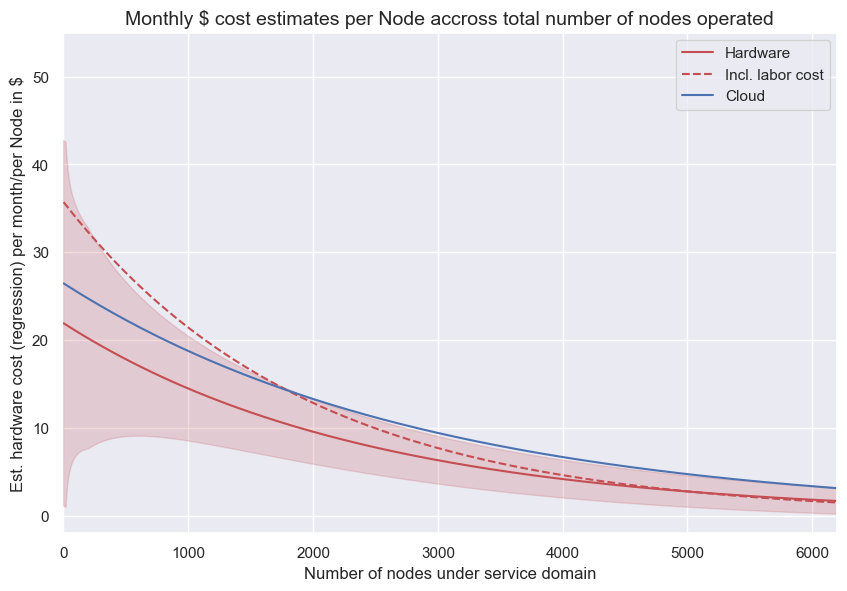

In [10]:
## cost estimates based on regression
sns.set_theme()
fig,axs=mp.subplots(figsize=(10,6.5))
df_chart=df_regression_data.copy()
# *
# (x_range/(1+x_range))*
axs.plot(df_chart.num_nodes.values, df_chart.reg_hardware.values, 'r', label="Hardware")
axs.plot(df_chart.num_nodes.values, df_chart.reg_all.values, 'r', linestyle='dashed', label="Incl. labor cost")
axs.plot(df_chart.num_nodes.values, df_chart.reg_cloud.values, 'b', label="Cloud")
axs.fill_between(df_chart.num_nodes.values, df_chart.reg_hardware_err_lower.values, df_chart.reg_hardware_err_upper.values, color="r", alpha=0.2)

axs.legend()
axs.set_ylim(-2,55)
axs.set_xlim(-10,6200)

axs.set_xlabel('Number of nodes under service domain', fontsize=12)
axs.set_ylabel('Est. hardware cost (regression) per month/per Node in $', fontsize=12)
axs.set_title('Monthly $ cost estimates per Node accross total number of nodes operated', fontsize=14)


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


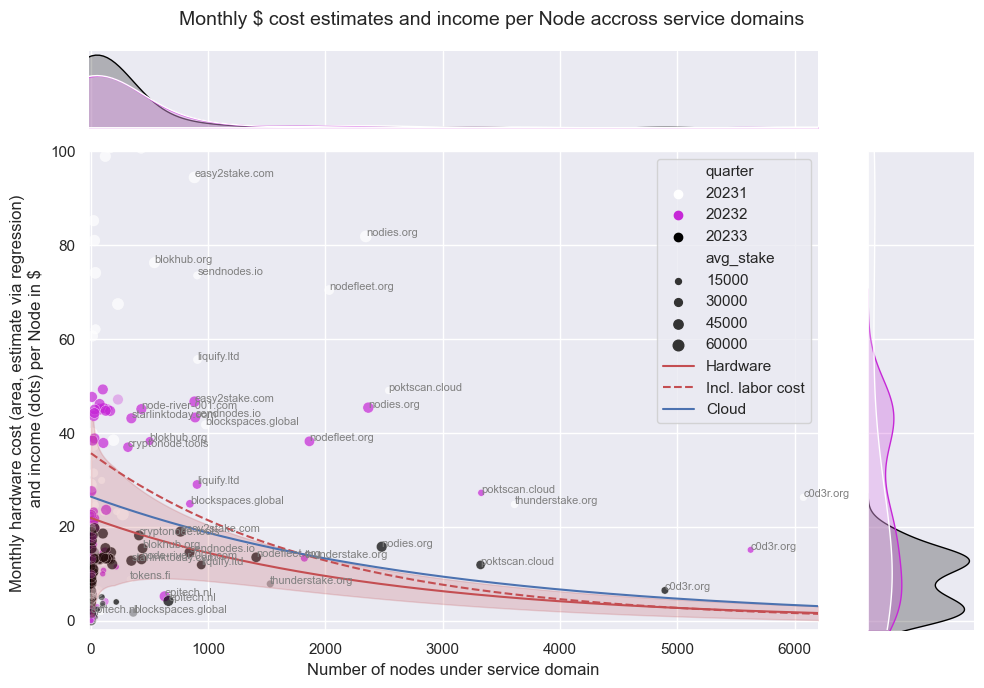

In [11]:
## joint plot with cost estimates and income per node
sns.set_theme()
pal = 'gnuplot2_r'
xcol = "num_nodes_final"
ycol = "rewards_per_node_final"
ylim_max = 100

g=sns.jointplot(data=df_rewards_quarter[df_rewards_quarter.active==1].reset_index(), x=xcol, y=ycol, hue="quarter", palette=pal, alpha=0.01,legend=False,height=8, ratio=5
,ylim=(-2,ylim_max)
, xlim=(-20,6200)
)

g.fig.set_figwidth(10)
g.fig.set_figheight(7)

sns.scatterplot(data=df_rewards_quarter[df_rewards_quarter.active==1],x=xcol, y=ycol, hue="quarter", palette=pal,size='avg_stake',  alpha=0.7, legend=True, ax=g.ax_joint)
sns.scatterplot(data=df_rewards_quarter[df_rewards_quarter.active==0],x=xcol, y=ycol, hue="quarter", palette=pal,size='avg_stake',  alpha=0.3, legend=False, ax=g.ax_joint)
g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_hardware.values, 'r', label="Hardware")
g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_all.values, 'r', linestyle='dashed', label="Incl. labor cost")
g.ax_joint.fill_between(df_regression_data.num_nodes.values, df_regression_data.reg_hardware_err_lower.values, df_regression_data.reg_hardware_err_upper.values, color="r", alpha=0.2)
g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_cloud.values, 'b', label="Cloud")
g.ax_joint.legend()

grp_domain=df_rewards_quarter.groupby('service_domain').agg({xcol:'mean'}).reset_index().sort_values(xcol,ascending=False)
for i in range(15):
    domain=grp_domain.service_domain.iloc[i]
    for j in range(len(df_rewards_quarter[df_rewards_quarter.service_domain==domain])):
        tmp=df_rewards_quarter[df_rewards_quarter.service_domain==domain].iloc[j]
        if tmp[ycol]< ylim_max:
            g.ax_joint.text(tmp[xcol],tmp[ycol],domain,fontsize=8, color='gray')
            

g.ax_joint.set_xlabel('Number of nodes under service domain', fontsize=12)
g.ax_joint.set_ylabel('Monthly hardware cost (area, estimate via regression) \n and income (dots) per Node in $', fontsize=12)
g.fig.suptitle('Monthly $ cost estimates and income per Node accross service domains', fontsize=14)
g.fig.tight_layout()


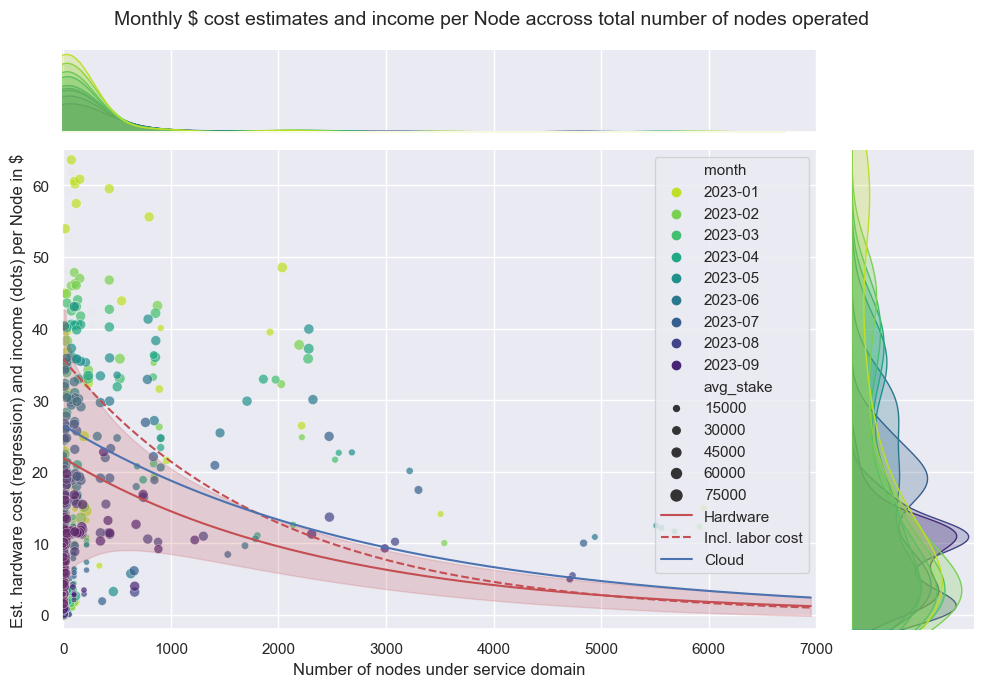

In [13]:
## same data but on monthly basis
sns.set_theme()
pal = 'viridis_r'
df_chart = df_rewards_month.copy()

g=sns.jointplot(data=df_chart.reset_index(), x="num_nodes_final", y="rewards_per_node_final_fixed", hue="month", palette=pal, alpha=0.01,legend=False,height=8, ratio=5
,ylim=(-2,65)
, xlim=(-10,7000)
)

g.fig.set_figwidth(10)
g.fig.set_figheight(7)

sns.scatterplot(data=df_chart,x="num_nodes_final", y="rewards_per_node_final_fixed", hue="month", palette=pal,size='avg_stake',  alpha=0.7, legend=True, ax=g.ax_joint)

g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_hardware.values, 'r', label="Hardware")
g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_all.values, 'r', linestyle='dashed', label="Incl. labor cost")
g.ax_joint.fill_between(df_regression_data.num_nodes.values, df_regression_data.reg_hardware_err_lower.values, df_regression_data.reg_hardware_err_upper.values, color="r", alpha=0.2)
g.ax_joint.plot(df_regression_data.num_nodes.values, df_regression_data.reg_cloud.values, 'b', label="Cloud")
g.ax_joint.legend()


g.ax_joint.set_xlabel('Number of nodes under service domain', fontsize=12)
g.ax_joint.set_ylabel('Est. hardware cost (regression) and income (dots) per Node in $', fontsize=12)
g.fig.suptitle('Monthly $ cost estimates and income per Node accross total number of nodes operated', fontsize=14)
g.fig.tight_layout()


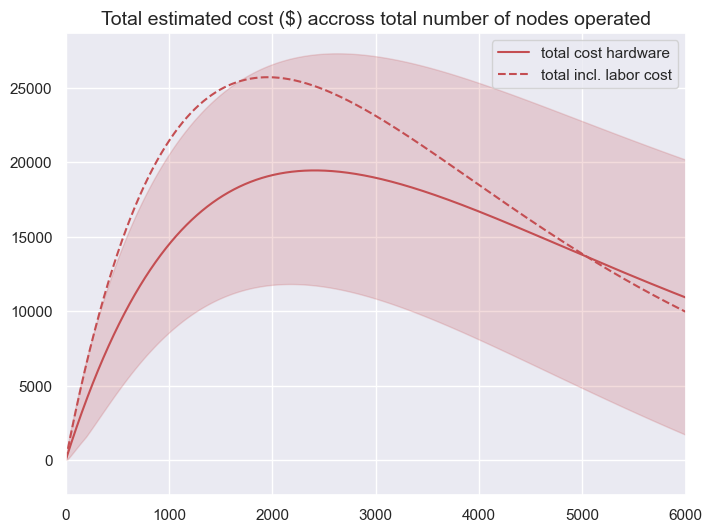

In [15]:
## total cost estimates
fig,axs=mp.subplots(figsize=(8,6))

axs.plot(df_regression_data.num_nodes.values,df_regression_data.num_nodes.values*df_regression_data.reg_hardware.values, color='r', label = 'total cost hardware')
axs.fill_between(df_regression_data.num_nodes.values,
df_regression_data.num_nodes.values*df_regression_data.reg_hardware_err_lower,
df_regression_data.num_nodes.values*df_regression_data.reg_hardware_err_upper, color='r', alpha=0.2)
axs.plot(df_regression_data.num_nodes.values,df_regression_data.num_nodes.values*df_regression_data.reg_all.values, color='r', linestyle='dashed', label='total incl. labor cost')
axs.set(
 xlim=(0,6000)
)
axs.set_title('Total estimated cost ($) accross total number of nodes operated', fontsize=14)
axs.legend()



## monthly aggregates

In [16]:

grp  =df_rewards_month.groupby('month').agg(
    num_nodes = ('num_nodes_final', 'sum'),
    total_rewards = ('total_rewards','sum'),
    total_relays = ('total_relays','sum'),
    num_domains = ('service_domain','nunique'),
    sum_cost=('cost_estimate_hardware_total','sum'),
    sum_cost_lower=('cost_estimate_hardware_lower_total','sum'),
    sum_cost_upper=('cost_estimate_hardware_upper_total','sum'),
    sum_cost_all=('cost_estimate_all_total','sum'),
    ).reset_index()

grp['rew_per_rel']=grp.total_rewards/grp.total_relays



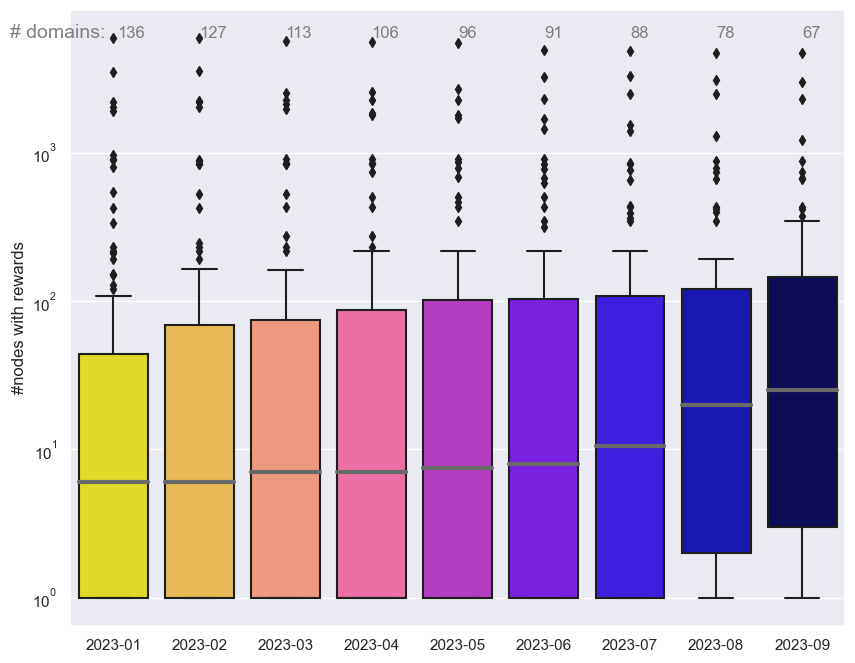

In [17]:

fig,axs=mp.subplots(figsize=(10,8))

pal = 'gnuplot2_r'

sns.boxplot(data=df_rewards_month,y='num_nodes_final',x='month', ax=axs, palette=pal, medianprops={'linewidth':3, 'color':'dimgray'}
            )
axs.set(
    yscale="log",
    ylabel='#nodes with rewards',
    xlabel=''
)
axs.text(-1.2,6000, '# domains:',fontsize=14, color='gray')
for i in range(len(grp)):
    if i==0:
        axs.text(i+0.05,6000,grp.iloc[i].num_domains, fontsize=12, color='gray') 
    else:
        axs.text(i,6000,grp.iloc[i].num_domains, fontsize=12
        , color='gray') 

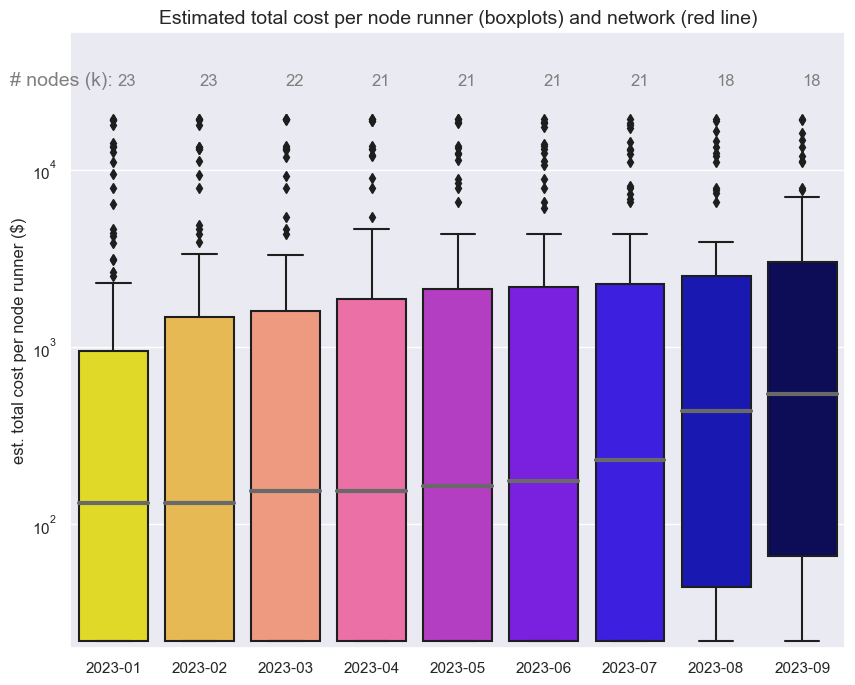

In [18]:

fig,axs=mp.subplots(figsize=(10,8))
y2_min=150
y2_max=400
y1_min = 20
y1_max=60000
tx_y = 30000

sns.boxplot(data=df_rewards_month,y='cost_estimate_hardware_total',x='month', ax=axs, palette=pal, medianprops={'linewidth':3, 'color':'dimgray'})
axs.set(
    yscale="log",
    ylabel='est. total cost per node runner ($)',
    xlabel=''
    , ylim=(y1_min,y1_max)
)
axs.set_title('Estimated total cost per node runner (boxplots) and network (red line)', fontsize=14)

axs.text(-1.2,tx_y, '# nodes (k):',fontsize=14, color='gray')
for i in range(len(grp)):
    if i==0:
        axs.text(i+0.05,tx_y,int(grp.iloc[i].num_nodes/1000), fontsize=12, color='gray') 
    else:
        axs.text(i,tx_y,int(grp.iloc[i].num_nodes/1000), fontsize=12
        , color='gray') 


[(0.0, 400.0), Text(0, 0.5, 'est. total cost network (k$)')]

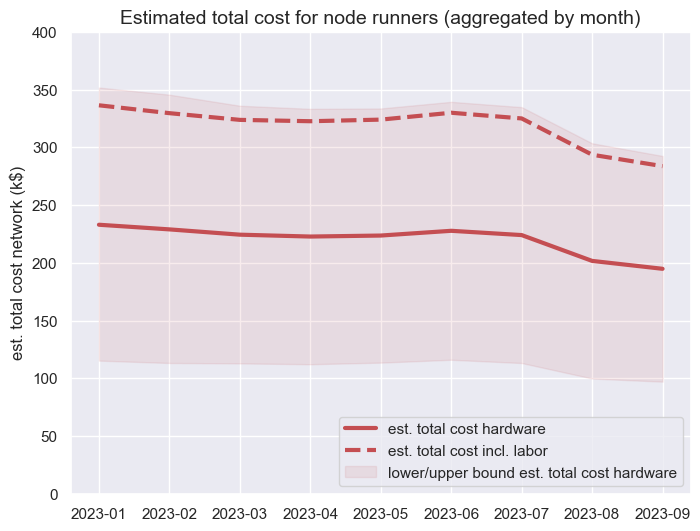

In [19]:

fig,axs=mp.subplots(figsize=(8,6))
y2_min=0
y2_max=400
y1_min = 20
y1_max=200000
tx_y = 350

axs.set_title('Estimated total cost for node runners (aggregated by month)', fontsize=14)

axs.plot(grp.month.values,grp.sum_cost.values/1000, color='r', linewidth=3,label='est. total cost hardware')
axs.plot(grp.month.values,grp.sum_cost_all.values/1000, color='r', linewidth=3,label='est. total cost incl. labor', linestyle='--')
axs.fill_between(grp.month.values,grp.sum_cost_lower.values/1000, grp.sum_cost_upper.values/1000, color='r',  alpha=0.1,label='lower/upper bound est. total cost hardware')
axs.legend(loc='lower right')

axs.set(
    ylim = (y2_min,y2_max),
    ylabel='est. total cost network (k$)'
)



## Storage and vCPUs

In [20]:
df_regression_data_cpu_storage=pd.read_csv('csvs/pocket_regression_data_vcpu_storage.csv')

(0.0, 800.0)

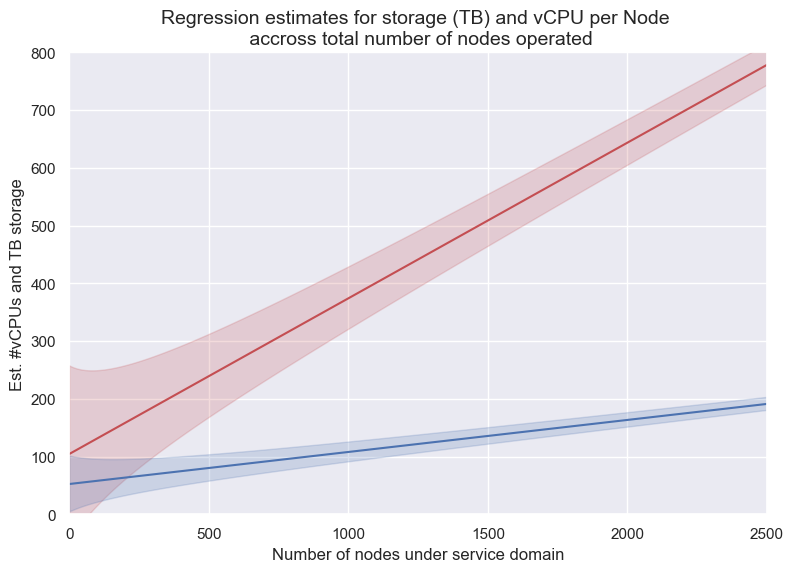

In [21]:
sns.set_theme()
fig,axs=mp.subplots(figsize=(9,6))


df_chart = df_regression_data_cpu_storage.copy()

axs.plot(df_chart.num_nodes.values, df_chart.reg_cpu.values, 'r', label="# vCPUs")
axs.fill_between(df_chart.num_nodes.values, df_chart.reg_cpu_err_lower.values, df_chart.reg_cpu_err_upper.values, color="r", alpha=0.2)

axs.plot(df_chart.num_nodes.values, df_chart.reg_storage.values, 'b', label="TB storage")
axs.fill_between(df_chart.num_nodes.values, df_chart.reg_storage_err_lower.values,df_chart.reg_storage_err_upper.values, color="b", alpha=0.2)

axs.set_xlim(0,2500)
axs.set_xlabel('Number of nodes under service domain', fontsize=12)
axs.set_ylabel('Est. #vCPUs and TB storage', fontsize=12)
axs.set_title('Regression estimates for storage (TB) and vCPU per Node \n accross total number of nodes operated', fontsize=14)
axs.set_ylim(0,800)
